<a href="https://colab.research.google.com/github/Guruprasadpvtac/Twits-sentiment-analysis/blob/master/TwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description : This is a sentiment analysis program that parses the tweets fetched from Twitter using Python

In [1]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Twitter Api Credentials
consumerKey = "EJED5ffKjikyqZV9mnIPn1jh8"
consumerSecret = "CKg3FpuVxfk11iGSXkecGJvhiiHn4BI65KsIsjLLuK7qXVQJdQ"
accessToken = "1293447300824481792-Pbb9yRXx6B7u8PhJV9XJUvijQFbofP"
accessTokenSecret = "AbQLehZuONkLa725fLfdLPMt9FLTD04Sm9IQqLiCOA7Ki"

In [10]:
pip install pandas profiling

     |████████████████████████████████| 634kB 6.8MB/s 
  Created wheel for profiling: filename=profiling-0.1.3-cp36-cp36m-linux_x86_64.whl size=50075 sha256=d752dc413d4a67c01ef84919aec4af16509cf3e22e5e57e4c4a7b0652a15897e
  Stored in directory: /root/.cache/pip/wheels/d9/3e/be/a50bacf7b03485684d992c67887390b418ab9e84e925d07283
  Created wheel for valuedispatch: filename=valuedispatch-0.0.1-cp36-none-any.whl size=2021 sha256=c7631321842ce3708ed2ec0327142481e26e25ab5f3b6287cfe25570a0e68a72
  Stored in directory: /root/.cache/pip/wheels/af/d2/1a/8326b4eaca6260bf7a905c68e7efe4a701c8af5eb7fab93ca2
  Created wheel for click-default-group: filename=click_default_group-1.2.2-cp36-none-any.whl size=3385 sha256=128e58ce02144a524fe594b891e3630858323d7686b3ce7527bab8659b7f2a12
  Stored in directory: /root/.cache/pip/wheels/ca/ed/79/2200269c285b0d21ab4591c6388a14691a4fc77d76bec40fe2
  Created wheel for urwid: filename=urwid-2.1.1-cp36-cp36m-linux_x86_64.whl size=256820 sha256=c74fadcf554cc2628de79b

In [11]:
pip install tweepy

In [3]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [4]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="BillGates", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')

Show the 5 recent tweets:

1) RT @antonioguterres: Last month, over 1 billion students were affected by #COVID19 school closures.

Even before the pandemic, the world wa…

1) Our foundation is partnering with @DonorsChoose to support teachers as they get ready to go back to school—in whatever form that takes—and will boost your donations to the classroom project of your choice today. https://t.co/nh3CnQI9vm

1) I always look forward to meeting Washington’s Teacher of the Year. This year’s recipient, Amy Campbell (@The_MrsCampbell), is a remarkable advocate for her students, and I loved learning about her approach to teaching special ed. https://t.co/kIMB19cK5S

1) Bill Foege was instrumental in the effort to eradicate smallpox (and is a personal hero of mine). Here he outlines how lessons learned from that campaign can apply to the fight against COVID-19. https://t.co/Ns8WvO9E4h

1) The world did not do enough to prepare for a pandemic. We can avoid making the same mistake with climate

In [5]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,"RT @antonioguterres: Last month, over 1 billio..."
1,Our foundation is partnering with @DonorsChoos...
2,I always look forward to meeting Washington’s ...
3,Bill Foege was instrumental in the effort to e...
4,The world did not do enough to prepare for a p...


In [6]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,": Last month, over 1 billion students were aff..."
1,Our foundation is partnering with to support ...
2,I always look forward to meeting Washington’s ...
3,Bill Foege was instrumental in the effort to e...
4,The world did not do enough to prepare for a p...
...,...
95,We’re hopeful that our foundation’s work with ...
96,It was a magical night. I'm very happy to supp...
97,Vaccines are a miracle. But how exactly do the...
98,Science is giving us the opportunity to improv...


In [7]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,": Last month, over 1 billion students were aff...",0.066667,0.000000
1,Our foundation is partnering with to support ...,0.250000,0.100000
2,I always look forward to meeting Washington’s ...,0.707143,0.602381
3,Bill Foege was instrumental in the effort to e...,0.300000,0.000000
4,The world did not do enough to prepare for a p...,0.528472,0.025000
...,...,...,...
95,We’re hopeful that our foundation’s work with ...,0.657778,0.131111
96,It was a magical night. I'm very happy to supp...,0.966667,0.800000
97,Vaccines are a miracle. But how exactly do the...,0.416667,0.283333
98,Science is giving us the opportunity to improv...,0.333333,-0.166667


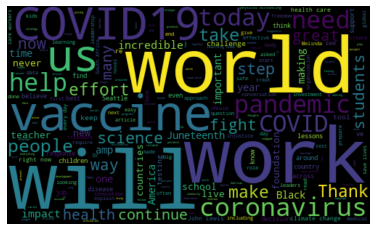

In [8]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [18]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
     
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,": Last month, over 1 billion students were aff...",0.066667,0.000000,Neutral
1,Our foundation is partnering with to support ...,0.250000,0.100000,Positive
2,I always look forward to meeting Washington’s ...,0.707143,0.602381,Positive
3,Bill Foege was instrumental in the effort to e...,0.300000,0.000000,Neutral
4,The world did not do enough to prepare for a p...,0.528472,0.025000,Positive
...,...,...,...,...
95,We’re hopeful that our foundation’s work with ...,0.657778,0.131111,Positive
96,It was a magical night. I'm very happy to supp...,0.966667,0.800000,Positive
97,Vaccines are a miracle. But how exactly do the...,0.416667,0.283333,Positive
98,Science is giving us the opportunity to improv...,0.333333,-0.166667,Negative


In [19]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) Our foundation is partnering with  to support teachers as they get ready to go back to school—in whatever form that takes—and will boost your donations to the classroom project of your choice today. 

2) I always look forward to meeting Washington’s Teacher of the Year. This year’s recipient, Amy Campbell (_MrsCampbell), is a remarkable advocate for her students, and I loved learning about her approach to teaching special ed. 

3) The world did not do enough to prepare for a pandemic. We can avoid making the same mistake with climate change by:

1. Letting science and innovation lead the way
2. Making sure solutions work for poor countries too
3. Getting started now



4) Great tips from _Bergstrom about how to find reliable sources of information and test claims you may see about the pandemic in your social media feeds. 

5) The impacts of COVID-19 are driving worrying increases in malnutrition and health outcomes. However, there are clear actions that ca

In [20]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) : Three lessons that have been central to the COVID19 response in South Africa, Liberia, &amp; other countries:
🔸 Screening…

2) Globally, a lack of medical oxygen–needed to treat pneumonia, malaria, and other diseases–leads to hundreds of thousands of deaths each year.  founded _Tele to address this often-overlooked challenge. 

3) : “It’s that clarity of language about the VALUE of black life in America that distinguishes Juneteenth as emancipation…

4) : “Only those feigning blindness fail to see the body of work we are, and the work of body we have done. 

Everything is what it is…

5) : Juneteenth recognizes &amp; celebrates Black people’s freedom and the end of slavery in the US!  19 Jun 1865 Union Army Genera…

6) _Nyongo: 1. This is Opal Lee, the force behind the movement to make Juneteenth a national holiday. Also known as Freedom Day, it…

7) …in policing, criminal justice, education, health care, housing, the workplace and all other areas of the

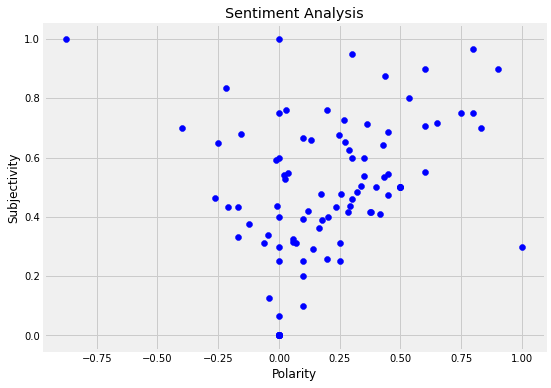

In [21]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [22]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

65.0

In [23]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

15.0

In [24]:
# Show the value counts
df['Analysis'].value_counts()

Positive    65
Neutral     20
Negative    15
Name: Analysis, dtype: int64

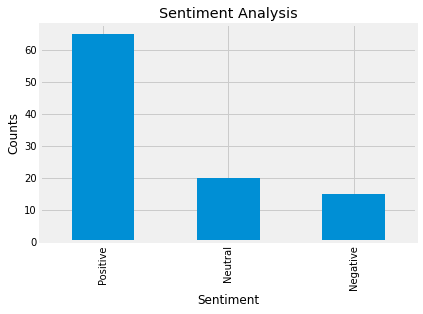

In [25]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()